In [18]:
import pandas as pd
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import sys
matplotlib.rcParams["figure.facecolor"] = "white"

In [117]:
df = pd.read_csv('temperature_data.csv', sep=';', names= ['Station','Date', 'Temperature'])
df.head()

,Station,Date,Temperature
0,Station,Date,Temperature
1,WSLLAF,202201010000,8.6
2,WSLLAF,202201010010,8.7
3,WSLLAF,202201010020,8.7
4,WSLLAF,202201010030,8.9


In [118]:
#drop first row
df = df.drop(df.index[0])

In [119]:
df.head()

,Station,Date,Temperature
1,WSLLAF,202201010000,8.6
2,WSLLAF,202201010010,8.7
3,WSLLAF,202201010020,8.7
4,WSLLAF,202201010030,8.9
5,WSLLAF,202201010040,8.6


In [120]:
# drop first column in df
df = df.drop(df.columns[0], axis=1)
df.head()

,Date,Temperature
1,202201010000,8.6
2,202201010010,8.7
3,202201010020,8.7
4,202201010030,8.9
5,202201010040,8.6


In [121]:
# change Date from YYYYMMDDHHMM to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head()


,Date,Temperature
1,2022-01-01 00:00:00,8.6
2,2022-01-01 00:10:00,8.7
3,2022-01-01 00:20:00,8.7
4,2022-01-01 00:30:00,8.9
5,2022-01-01 00:40:00,8.6


In [122]:
#how many rows and columns
df.shape


(47985, 2)

In [123]:
#what is the type of the temperature column?
df['Temperature'].dtype

# how many rows contain '-' in the string 
df[df['Temperature'].str.contains('-')].count()




Date           13993
Temperature    13993
dtype: int64

In [124]:

df_nan= df[df['Temperature']=='-']
df_nan.shape


(11177, 2)

In [125]:
df_nan.head()

,Date,Temperature
338,2022-01-03 08:10:00,-
782,2022-01-06 10:10:00,-
806,2022-01-06 14:10:00,-
914,2022-01-07 08:10:00,-
1238,2022-01-09 14:10:00,-


In [126]:
# replace '-' with NaN
df_nan = df_nan.replace('-', np.nan)
#make a liste of the index of the rows with NaN
df_nan_index = df_nan.index.tolist()


In [127]:
# drop the rows from df with the index in df_nan_index
df = df.drop(df_nan_index)

In [128]:
# change the type of the temperature column to float
df['Temperature'] = df['Temperature'].astype(float)


In [129]:
df.shape

(36808, 2)

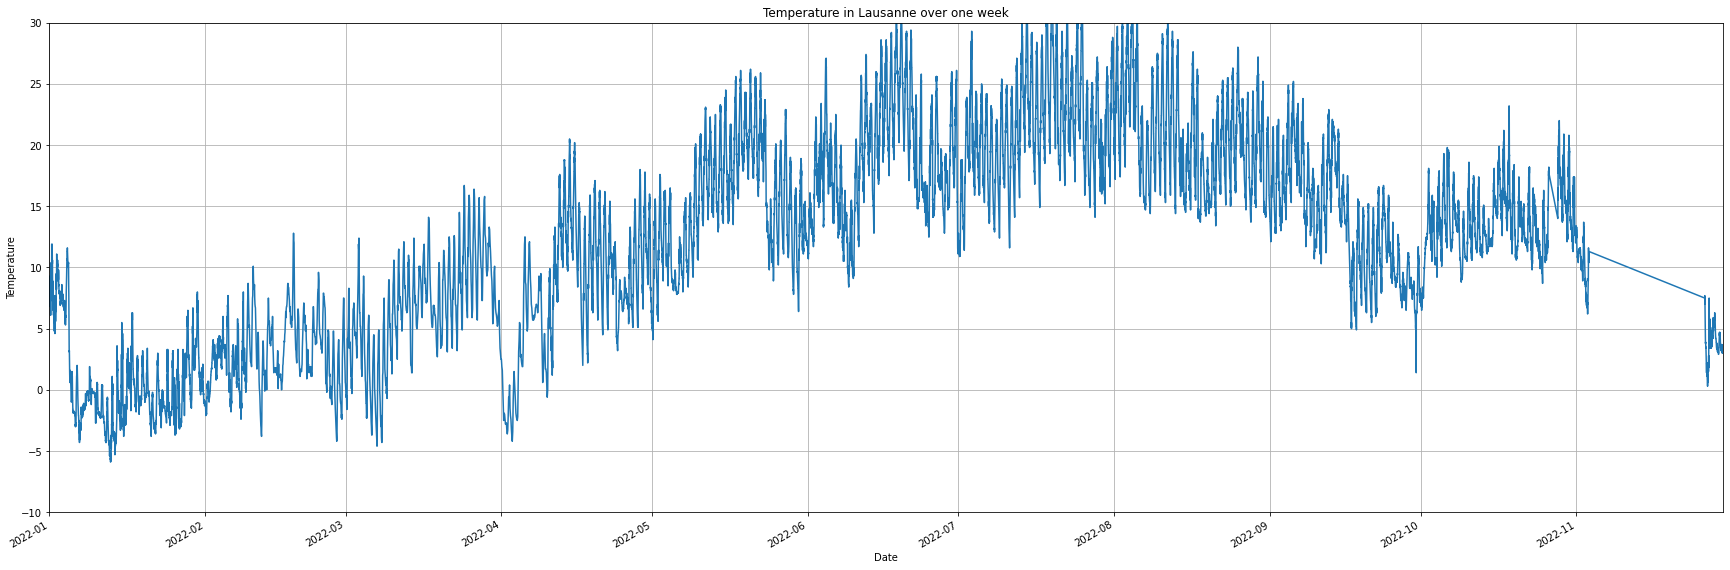

In [132]:
fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(df['Date'], df['Temperature'])
ax.set_title('Temperature in Lausanne over one week')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
ax.set_xlim(df['Date'].min(), df['Date'].max() )
# y axis in croissant order
ax.set_ylim(-10, 30)
ax.grid(True)
fig.autofmt_xdate()
plt.show()

In [37]:
df_irr = pd.read_csv('radiation_data.csv', sep=';')
df_irr = df_irr.drop(df_irr.columns[0], axis=1)
df_irr['Date'] = pd.to_datetime(df_irr['Date'], format='%Y%m%d%H%M')
df_irr.head()

,Date,Irradiance
0,2022-01-01 00:00:00,0
1,2022-01-01 00:10:00,0
2,2022-01-01 00:20:00,0
3,2022-01-01 00:30:00,0
4,2022-01-01 00:40:00,0


In [40]:
# convert Irradiance to float
df_irr['Irradiance'] = df_irr['Irradiance'].str.replace(',', '.').astype(float)

ValueError: could not convert string to float: '-'

TypeError: can only concatenate str (not "DateOffset") to str

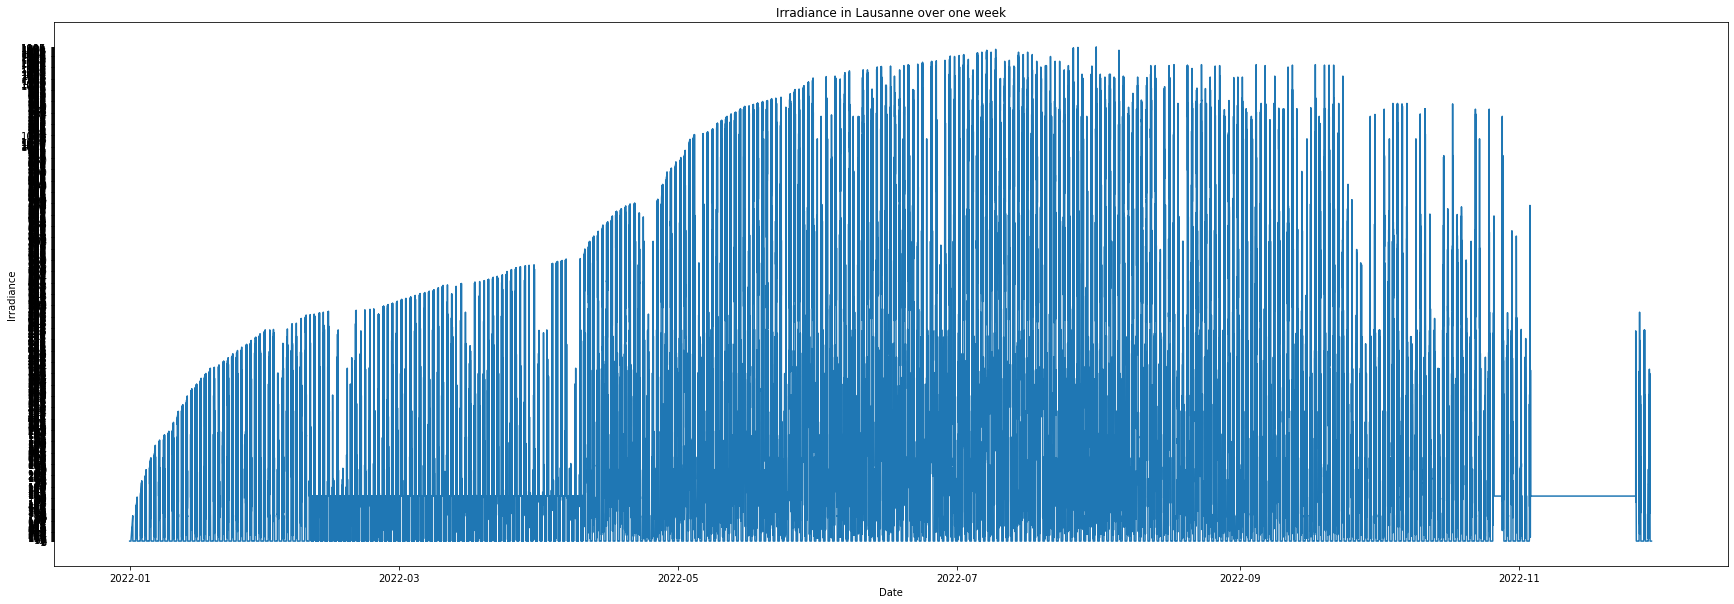

In [39]:
fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(df_irr['Date'], df_irr['Irradiance'])
ax.set_title('Irradiance in Lausanne over one week')
ax.set_xlabel('Date')
ax.set_ylabel('Irradiance')
ax.set_xlim(df_irr['Irradiance'].min(), df_irr['Irradiance'].min() + pd.DateOffset(days=7))
# y axis in croissant order
ax.set_ylim(df['Irradiance'].min(), df['Irradiance'].max())
ax.grid(True)
fig.autofmt_xdate()
plt.show()